<a href="https://colab.research.google.com/github/axiom19/Mitsuba_Render_Tutorial/blob/main/v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install mitsuba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import mitsuba as mi

In [10]:
import matplotlib.pyplot as plt

<h3>Setting the variant of Mitsuba</h3>
<ol><li> Settings have either GPU or CPU usage
<li> scalar or vectorized inputs
<li> Automatic Differentiation or not

In [11]:
mi.variants() # this method shows the available variants which could be used

['scalar_rgb', 'scalar_spectral', 'cuda_ad_rgb', 'llvm_ad_rgb']

In [12]:
mi.set_variant('scalar_rgb') # setting variants to CPU usage rendering with scalar input without automatic differentiation

# Create an object scene Dictionary or load an XML file 
<ul><li>Inegrator : How the light source interacts with object
<li> BSDF : Surface scattering models describe the manner in which light interacts with surfaces in the scene
<li> Emitter : How the light is emitted from the light source (Area , Point Source, Projection Light Source, etc)
<li> Film : A film defines how conducted measurements are stored and converted into the final output file that is written to disk at the end of the rendering process (HDR or Spectral Film)
<li> Participating Media : Media inside or outside the object
<li> Phase Functions
<li> Sampler: which samples the points in the geometry to give integration process a head start
<li> Sensors : Camera view like angles, FOV, POV 



In [168]:
scene = mi.load_dict({
    "type": "scene",

    ########### define integrator
    "myintegrator": {
        "type": "path",
    },

    ########### define sensors
    "mysensor": {
        "type": "perspective",
        "fov":140,
        "to_world": mi.ScalarTransform4f.look_at(origin=[-9, 9, 6],
                                                 target=[4, 0, 0],
                                                 up=[0, 0, 1]),
        "myfilm": {
            "type": "hdrfilm",
            "rfilter": {
                "type": "box"
            },
            "width": 1024,
            "height": 768,
        }, "mysampler": {
            "type": "independent",
            "sample_count": 4,
        },
    },

    ############# Point source emitters ###################
    # ####### define emitters
    # "myemitter1": {
    #     "type": "point",
    #     "to_world" : mi.ScalarTransform4f.look_at(
    #         origin=[9,4,0],
    #         target=[0,0,0],
    #         up=[0,0,2]
    #     ),
    #     'intensity' : {
    #         'type': 'spectrum',
    #         'value': 20.0
    #     }
    # },

    # "myemitter2": {
    #     "type": "point",
    #     "to_world" : mi.ScalarTransform4f.look_at(
    #         origin=[4,3,1],
    #         target=[0,0,0],
    #         up=[0,0,2]
    #     ),
    #     'intensity' : {
    #         'type': 'spectrum',
    #         'value': 10.0
    #     }
    # },


    # ############# Constant Environment emitters ###################
    # "area_emitter_1": {
    #     "type": "constant",
    #     "radiance" : {
    #         "type" : "rgb",
    #         "value": 1
    #     }
    # },


    ####### define shape 
    "myshape": {
        "type": "sphere",
        # "filename" : "cube.obj",
        'emitter':{
            'type':'area',
            'radiance':{
                'type':'rgb',
                'value':20
            }
        },
        "center" : [4,0,35],
        'radius' : 5,
        "mybsdf": {
            "type": "diffuse",
            "reflectance": {
                "type": "rgb",
                "value": [0.9, 0.05, 0.05],
            }
        }
    },

    "another_shape":{
        "type":"sphere",
        "center":[4,0,-95],
        'radius':100,
        'bsdf':{
            'type':'diffuse',
            'reflectance':{
                'type':'rgb',
                'value':[0.3,0.25,0.7]
            }
        }
}})

In [169]:
img = mi.render(scene, spp=255)

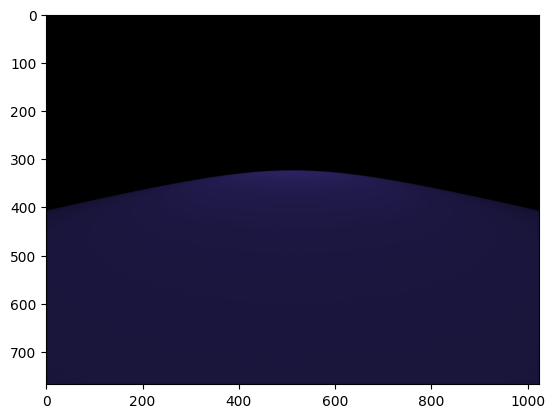

In [170]:
plt.imshow(img)

In [ ]:
# integrator = mi.load_dict({
#     "type" : "path",
#     "max_depth" : 5 
# })


# sensors = mi.load_dict({
#     "type" : "prespective",
#     "fov" : 45,
#     "to_world": mi.ScalarTransform4f.look_at(origin=[10, 4, 0],
#                                                  target=[0, 0, 0],
#                                                  up=[0, 0, 1]),
#     "myfilm": {
#             "type": "hdrfilm",
#             "rfilter": {
#                 "type": "box"
#             },
#             "width": 1024,
#             "height": 768,
#         }, "mysampler": {
#             "type": "independent",
#             "sample_count": 16,
#         },
# })


# emitter = mi.load_dict({
#         "myemitter1": {
#         "type": "point",
#         "to_world" : mi.ScalarTransform4f.look_at(
#             origin=[7,4,0],
#             target=[0,0,0],
#             up=[0,0,1]
#         ),
#         'intensity' : {
#             'type': 'spectrum',
#             'value': 20.0
#         }
#     }
# })

# sensor = mi.load_dict({
    
# })